In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import time
from IPython.core.debugger import Tracer;

In [2]:
dataset = pd.read_csv("HLTVData/playerStats.csv")


In [45]:
dataset.head()

,Map,Player,Kills,Deaths,ADR,KAST%,Rating,MatchID
0,Nuke,4216,22,19,85.0,69.0,1.17,2311133/binary-dragons-vs-alpha-binary-dragons...
1,Nuke,3543,26,23,83.5,58.6,1.10,2311133/binary-dragons-vs-alpha-binary-dragons...
2,Nuke,3972,20,23,78.2,75.9,1.02,2311133/binary-dragons-vs-alpha-binary-dragons...
3,Nuke,2476,17,20,68.1,79.3,0.97,2311133/binary-dragons-vs-alpha-binary-dragons...
4,Nuke,2299,17,20,66.3,65.5,0.86,2311133/binary-dragons-vs-alpha-binary-dragons...


In [4]:
#mat = dataset.as_matrix()
#dataADR = dataset['ADR']
#dataRaiting = dataset['Rating']
#indexMatrix = np.array(range(dataset.shape[0]))

In [5]:
dataSet = pd.read_csv("HLTVData/playerStats.csv",usecols=['ADR','Rating'])
dataSet['Rating'] = dataSet['Rating']*100
dataSet.head()

,ADR,Rating
0,85.0,117.0
1,83.5,110.0
2,78.2,102.0
3,68.1,97.0
4,66.3,86.0


In [6]:
#dataSet['Rating'] = dataSet['Rating']*100
#dataSet.head()

In [7]:
#this never worked
#4 is the ADR and 6 is the Rating
#s = pd.DataFrame(dataset, index=indexMatrix,columns=(mat[:,4],mat[:,6]) )
#s = pd.DataFrame(dataset, index=np.array(range(dataset.shape[0])), columns=dataset['ADR'])

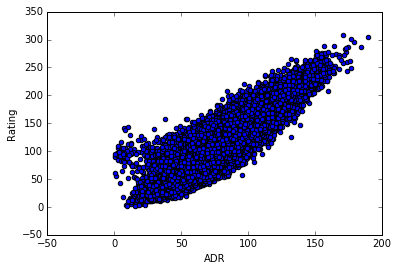

In [8]:
X= np.array(dataSet['ADR'])
y = np.array(dataSet['Rating'])
plt.scatter(X,y)
plt.xlabel('ADR')
plt.ylabel('Rating')
plt.show()

In [9]:
data = np.array(dataSet)
data
data[1,0]

83.5

In [10]:
def SSE(m,b,data):
    totalError=0.0
    totalNan = 0
    for i in range(data.shape[0]):
        if(math.isnan(data[i,0])):
            totalNan +=1
        else:
            yOutput = m*data[i,0]+b
            y = data[i,1]
            error = (y-yOutput)**2
            totalError =totalError+ error
    return totalError
        

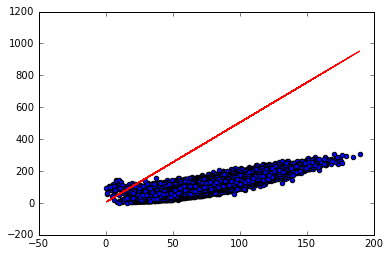

In [61]:
m = 5
b = 4
plt.scatter(X,y)
plt.plot(X,m*X+b,color='red')
plt.show()

In [31]:
sse = SSE(m,b,data)
print('For the fitting line: y = %sx + %s\nSSE: %.2f' %(m,b,sse))

For the fitting line: y = 5x + 4
SSE: 14663066056.50


%%latex

o make these ideas more precise, stochastic gradient descent works by randomly picking out a small number m of randomly chosen training inputs. We'll label those random training inputs X_1, X_2, \ldots, X_m, and refer to them as a mini-batch. Provided the sample size m is large enough we expect that the average value of the \nabla C_{X_j} will be roughly equal to the average over all \nabla C_x, that is,
\begin{eqnarray}
  \frac{\sum_{j=1}^m \nabla C_{X_{j}}}{m} \approx \frac{\sum_x \nabla C_x}{n} = \nabla C,
\tag{18}\end{eqnarray}
where the second sum is over the entire set of training data. Swapping sides we get
\begin{eqnarray}
  \nabla C \approx \frac{1}{m} \sum_{j=1}^m \nabla C_{X_{j}},
\tag{19}\end{eqnarray}
confirming that we can estimate the overall gradient by computing gradients just for the randomly chosen mini-batch.

To connect this explicitly to learning in neural networks, suppose w_k and b_l denote the weights and biases in our neural network. Then stochastic gradient descent works by picking out a randomly chosen mini-batch of training inputs, and training with those,
\begin{eqnarray} 
  w_k & \rightarrow & w_k' = w_k-\frac{\eta}{m}
  \sum_j \frac{\partial C_{X_j}}{\partial w_k} \tag{20}\\
  
  b_l & \rightarrow & b_l' = b_l-\frac{\eta}{m}
  \sum_j \frac{\partial C_{X_j}}{\partial b_l},
\tag{21}\end{eqnarray}
where the sums are over all the training examples X_j in the current mini-batch. Then we pick out another randomly chosen mini-batch and train with those. And so on, until we've exhausted the training inputs, which is said to complete an epoch of training. At that point we start over with a new training epoch.




In [32]:
def stochastic_gradient_descent_step(m,b,data_sample):
    
    n_points = data_sample.shape[0] #size of data
    m_grad = 0
    b_grad = 0
    stepper = 0.0001 #this is the learning rate
    
    for i in range(n_points):

        #Get current pair (x,y)
        x = data_sample[i,0]
        y = data_sample[i,1]
        if(math.isnan(x)|math.isnan(y)): #it will prevent for crashing when some data is missing
            #print("is nan")
            continue
        
        #you will calculate the partical derivative for each value in data
        #Partial derivative respect 'm'
        dm = -((2/n_points) * x * (y - (m*x + b)))
        
        #Partial derivative respect 'b'
        db = - ((2/n_points) * (y - (m*x + b)))
       
        
        #Update gradient
        m_grad = m_grad + dm
        b_grad = b_grad + db
        
    #Set the new 'better' updated 'm' and 'b'   
    m_updated = m - stepper*m_grad
    b_updated = b - stepper*b_grad
    #print('m ', m)
    ##print('steepr*gradient ',stepper*m_grad)
    #print('m_updated', m_updated)
    '''
    Important note: The value '0.0001' that multiplies the 'm_grad' and 'b_grad' is the 'learning rate', but it's a concept
    out of the scope of this challenge. For now, just leave that there and think about it like a 'smoother' of the learn, 
    to prevent overshooting, that is, an extremly fast and uncontrolled learning.
    '''
    
    return m_updated,b_updated

the diference beetween Gradient Descent, Stolchastich Gradient Descent and Mini-batch Gradient Descent is the next:

Gradient Descent: You take all the data to compute the gradient.

Stochastic Gradient Descent: You only take 1 point to compute the gradient (the bath size is 1) It is faster than Gradient Descent but is to noisy and is afected for the data variance.

Mini-Batch Gradient Descent: you take n points (n< data_size) to compute the gradient. Normally you take n aleatory points. 

As note if you take in Mini-batch gradient descent n==data_size you will be computing normal gradient descent. 
The difference between Stochastic Gradient Descent and Mini-batch Gradient descent is the size we take for computing the gradient.

As you can see in the example bellow I add the first condition to return a sigle random row from the data if the batch_size is equal to 1. But is just for recall the point in the code about the difference between SGD and mini-batch GD. If you analize the code, you can delete the first two line of code and the algorith will result the same for SGD, because if you choose the batch_size equal to 1 it becomes in SGD

In [75]:
def getSmallRandomDataSample(data, batch_size, shuffle=True): #this method only covers the solution when suffle is true
    #stolchastic gradient descent
    
    #it will take tha batch of size 1, Im just putting this here so you can see the difference. You can delete the next 
    #two lines and it will work.
    if(batch_size==1):
        return np.array([random.choice(data)])
    #mini-batch gradient descent
    if(batch_size< data.shape[0]):
        if(shuffle):
            #the first two line are simulating like if we were choosing randomly points from the data
            index = np.random.permutation(data.shape[0]) #first suffle the index of data
            index = index[0:batch_size] #then we take the batch 
            #algorithm for getting the sample_data
            data_sample=[]
            for i in index:
                data_sample.append(data[i])
            return np.array(data_sample)
   
            

In [76]:
max_epochs = 100
print('Starting line: y = %.2fx + %.2f - Error: %.2f' %(m,b,sse))
start = time.time()
for i in range(max_epochs):
    data_sample = getSmallRandomDataSample(data,1)
    m,b = stochastic_gradient_descent_step(m,b,data_sample)
    sse = SSE(m,b,data)
    if(i%10==0):
        end = time.time()
        print('time consumtion = ',end-start)
        print('iteration ', i)
        start = time.time()
    #print('At step %d - Line: y = %.2fx + %.2f - Error: %.2f' %(i+1,m,b,sse))
print('\nBest  line: y = %.2fx + %.2f - Error: %.2f' %(m,b,sse))


Starting line: y = 1.00x + 3.97 - Error: 202258448.74
sgd
data sample  [[ 64.5  94. ]]
time consumtion =  0.7025272846221924
iteration  0
sgd
data sample  [[  72.7  109. ]]
sgd
data sample  [[  82.1  108. ]]
sgd
data sample  [[ 63.6  71. ]]
sgd
data sample  [[ 57.9  75. ]]
sgd
data sample  [[  99.2  154. ]]
sgd
data sample  [[  90.7  140. ]]
sgd
data sample  [[ 73.7  80. ]]
sgd
data sample  [[ 47.9  56. ]]
sgd
data sample  [[  81.4  153. ]]
sgd
data sample  [[ 71.9  90. ]]
time consumtion =  4.600805044174194
iteration  10
sgd
data sample  [[  65.7  128. ]]
sgd
data sample  [[  81.8  131. ]]
sgd
data sample  [[  90.5  133. ]]


KeyboardInterrupt: 

m  1.3955785516
b  3.97443192501


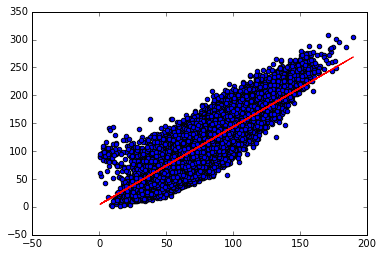

In [77]:
print ('m ', m)
print('b ', b)
plt.scatter(X,y)
plt.plot(X,m*X+b,color='red')
plt.show()

In [50]:
#this is to undertand what a permutation does.
#a = np.random.permutation(100)
#a.sort(kind='quicksort')
#a

array([ 61.2,  72. ])

In [ ]:
#for gradient descent m = 1.4 , b = 0.77
#for SGD m = m  1.33361120453 , b =  3.71735648458
#for SGD batch=1  m  1.33361120453 , b =  3.71735648458 It has been the best line